In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import pyro
from models.time_depend01 import model2
from utils.plot_gamma import plot_gamma

/opt/anaconda3/envs/dmm_pyro/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def data_generator(length,cp,inc1,inc2):
    data = []
    mean = 0.0
    for i in range(length):
        if i < cp:
            data.append(np.random.normal(mean,0.01))
            mean += inc1
        else:
            data.append(np.random.normal(mean,0.01))
            mean += inc2
    return data

In [3]:
#from plot import plot
data1=data_generator(100,50,1.0,5.0)
#plot(data1)

In [4]:
adam = pyro.optim.Adam({"lr": 0.02}) 
elbo = pyro.infer.Trace_ELBO()
model= model2(torch.tensor(data1),len(data1),1.0,1.0,1.0,1.0,10.0,0.05,10.0,0.25)
svi = pyro.infer.SVI(model.generator,model.inference , adam, elbo)

0
p [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
a1 9.801986733076765
b1 0.051010067001291244
a2 9.801986733121314
b2 0.25505033500510843


FileNotFoundError: [Errno 2] No such file or directory: 'result02/0.png'

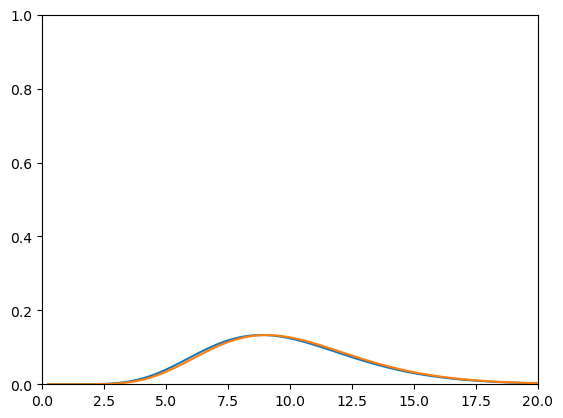

In [5]:
losses=[]
probs=[]
for step in range(1000):  # Consider running for more steps.
    loss = svi.step(torch.tensor(data1))
    losses.append(loss)
    if step%10==0:
        print(step)
        print("p",pyro.param("p").data.cpu().numpy())
        print("a1",pyro.param("a1").data.cpu().numpy())
        print("b1",pyro.param("b1").data.cpu().numpy())
        print("a2",pyro.param("a2").data.cpu().numpy())
        print("b2",pyro.param("b2").data.cpu().numpy())
        a1=pyro.param("a1").data.cpu().numpy()
        b1=pyro.param("b1").data.cpu().numpy()
        a2=pyro.param("a2").data.cpu().numpy()
        b2=pyro.param("b2").data.cpu().numpy()
        plot_gamma(step,a1,b1,a2,b2)
    #a1=pyro.param("a1").data.cpu().numpy()
    #b1=pyro.param("b1").data.cpu().numpy()
    #a2=pyro.param("a2").data.cpu().numpy()
    #b2=pyro.param("b2").data.cpu().numpy()
    #plot_gamma(a1,b1,a2,b2)
        

In [ ]:
a1=pyro.param("a1").data.cpu().numpy()
b1=pyro.param("b1").data.cpu().numpy()
a2=pyro.param("a2").data.cpu().numpy()
b2=pyro.param("b2").data.cpu().numpy()




In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import gamma
import numpy as np
def plot_gamma(a1,b1,a2,b2):
    fig, ax=plt.subplots(1,1)
    x = np.linspace(max(gamma.ppf(0.0,a1,b1),gamma.ppf(0.0,a2,b2)),
                    max(gamma.ppf(0.999,a1,b1),gamma.ppf(0.999,a2,b2)),100)
    ax.set_xlim(0.0,20.0)
    ax.plot(x, gamma.pdf(x,a1, b1))
    ax.plot(x, gamma.pdf(x,a2, b2))

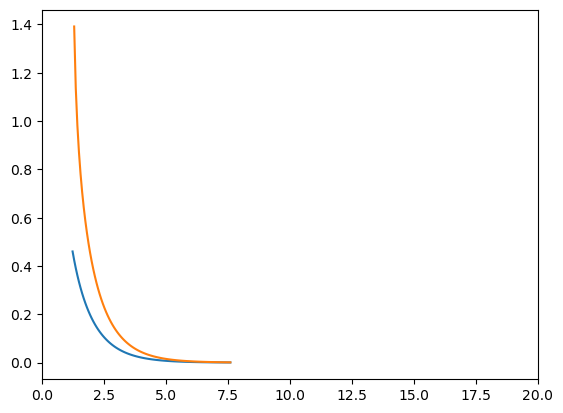

In [ ]:
plot_gamma(a1,b1,a1,b2)

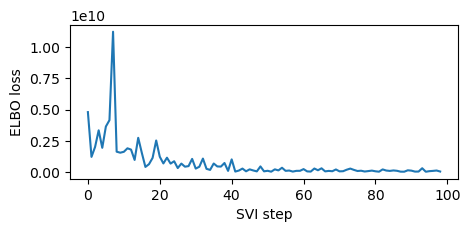

In [ ]:
plt.figure(figsize=(5, 2))
plt.plot(losses[0:99])
plt.xlabel("SVI step")
#plt.ylim([0,100])
plt.ylabel("ELBO loss");

IndexError: list index out of range

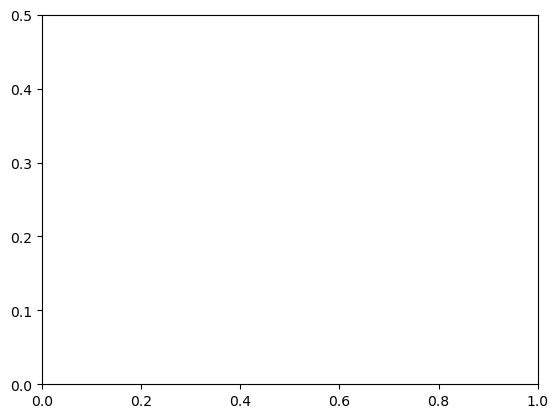

In [ ]:
import matplotlib.pyplot as plt
for i in range(100000):
    if i%1000==0:
        plt.ylim(0.0,0.5)   
        plt.bar(np.array(range(99)),probs[i])
        plt.savefig("result01/"+str(i).zfill(6))
        plt.clf()

In [ ]:
!convert -delay 1 -loop 0 result02/*.png result02/prob_tau.gif